In [5]:
# !pip install tensorflow
# !pip install matplotlib

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [4]:
import ipywidgets
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
folder_cn="data\\data_capitalisation_ancien_site\\data_csv\\capitalisation_analysee.csv"
cap=pd.read_csv(folder_cn)
cap.head(10)

,Unnamed: 0,date,capitalisation,cap_normalisee,fourrier,cap_moins_fourrier
0,0,2008-01-02,5.985440e+11,0.604811,0.646335,-0.041524
1,1,2008-01-03,6.056810e+11,0.626987,0.646236,-0.019249
2,2,2008-01-04,6.140960e+11,0.653134,0.646139,0.006995
3,3,2008-01-07,6.203390e+11,0.672532,0.646042,0.026490
4,4,2008-01-08,6.222680e+11,0.678526,0.645945,0.032581
5,5,2008-01-09,6.312690e+11,0.706493,0.645849,0.060644
6,6,2008-01-14,6.297450e+11,0.701758,0.645754,0.056004
7,7,2008-01-15,6.340110e+11,0.715013,0.645659,0.069355
8,8,2008-01-16,6.353910e+11,0.719301,0.645564,0.073738
9,9,2008-01-17,6.431290e+11,0.743344,0.645469,0.097876


In [7]:
cp=cap["cap_normalisee"]
cp

0       0.604811
1       0.626987
2       0.653134
3       0.672532
4       0.678526
          ...   
3811    0.438717
3812    0.439761
3813    0.438372
3814    0.430328
3815    0.434044
Name: cap_normalisee, Length: 3816, dtype: float64

In [8]:
ncap=np.array(cp)
def plot_as_matrix(depart:int=0,taille:int=10):
    if depart+taille**2 <len(ncap):
        plt.figure(figsize=(5,5))
        vals=ncap[depart:depart+taille**2]
        vals=vals.reshape(taille,taille)
        plt.imshow(vals)
        plt.colorbar()
        plt.show()

ipywidgets.interact(plot_as_matrix, 
                    depart=(0,len(ncap)-1,1),
                    taille=(2,64,2)
                   )

interactive(children=(IntSlider(value=0, description='depart', max=3815), IntSlider(value=10, description='tai…

<function __main__.plot_as_matrix(depart: int = 0, taille: int = 10)>

In [9]:
def creation_dataset(capitalisation,taille_fenetre):
    data=[]
    labels=[]
    for i in range(len(capitalisation)-1-taille_fenetre*taille_fenetre):
        li=[capitalisation[j]  for j in range(i,i+taille_fenetre*taille_fenetre,1)   ]
        data.append(li)
        labels.append(capitalisation[ i+taille_fenetre*taille_fenetre  ])
    return np.array(data), np.array(labels)

data, labels=creation_dataset(capitalisation=cp,taille_fenetre=10)

print(data.shape)
print(labels.shape)

(3715, 100)
(3715,)


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(10, 10, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))  # Aucune fonction d'activation pour la régression

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Utilisez une métrique appropriée

In [16]:
facteur =3000

d_tr=data[:facteur]
d_tr=d_tr.reshape((facteur, 10, 10, 1))
l_tr=labels[:facteur]

d_ts=data[facteur:]
d_ts=d_ts.reshape((len(data)-facteur, 10, 10, 1))
l_ts=labels[facteur:]

In [17]:
d_tr.shape

(3000, 10, 10, 1)

In [28]:
h=model.fit(d_tr, l_tr, epochs=100, batch_size=64, validation_split=0.1)

Epoch 1/100
43/43 [==============================] - 0s 5ms/step - loss: 8.7533e-04 - mae: 0.0221 - val_loss: 0.0034 - val_mae: 0.0336
Epoch 2/100
43/43 [==============================] - 0s 5ms/step - loss: 8.6667e-04 - mae: 0.0221 - val_loss: 0.0037 - val_mae: 0.0349
Epoch 3/100
43/43 [==============================] - 1s 12ms/step - loss: 9.2853e-04 - mae: 0.0227 - val_loss: 0.0044 - val_mae: 0.0397
Epoch 4/100
43/43 [==============================] - 0s 7ms/step - loss: 0.0010 - mae: 0.0241 - val_loss: 0.0029 - val_mae: 0.0325
Epoch 5/100
43/43 [==============================] - 0s 5ms/step - loss: 8.5077e-04 - mae: 0.0217 - val_loss: 0.0030 - val_mae: 0.0380
Epoch 6/100
43/43 [==============================] - 1s 12ms/step - loss: 7.7376e-04 - mae: 0.0205 - val_loss: 0.0031 - val_mae: 0.0325
Epoch 7/100
43/43 [==============================] - 0s 9ms/step - loss: 8.2160e-04 - mae: 0.0211 - val_loss: 0.0029 - val_mae: 0.0325
Epoch 8/100
43/43 [==============================] - 1s 1

In [29]:
predictions=model.predict(d_ts)

23/23 [==============================] - 0s 2ms/step


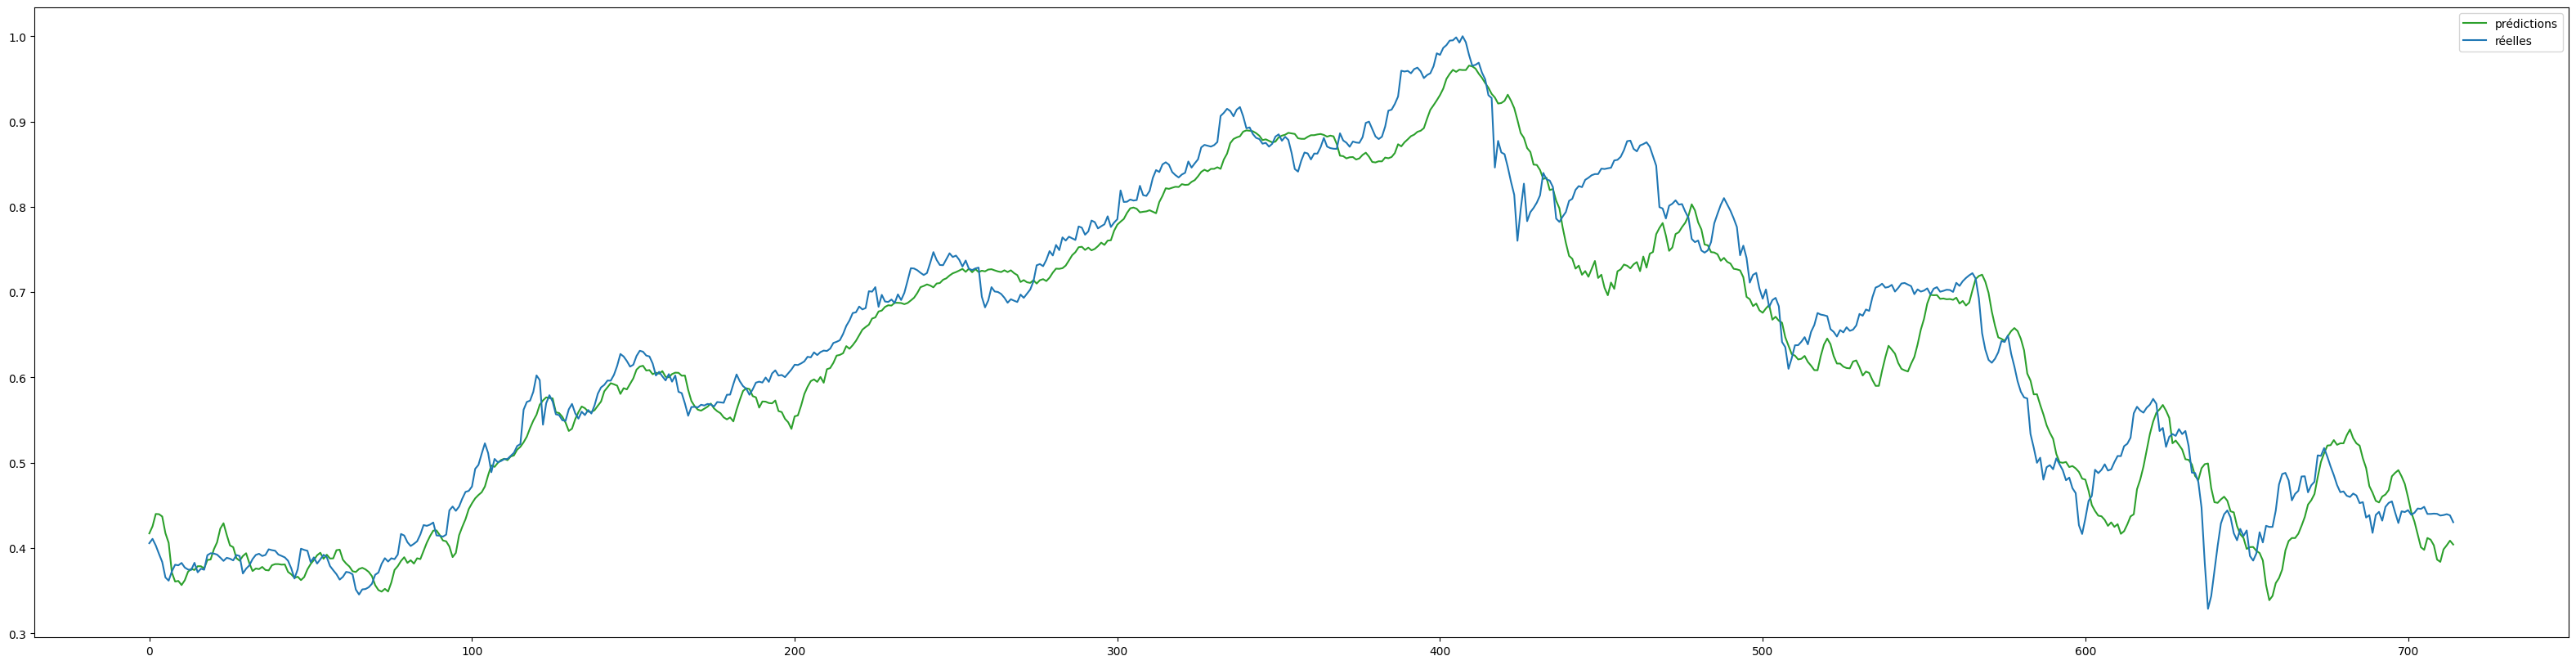

In [30]:
plt.figure(figsize=(40,10))
plt.plot(predictions, color="C2")
plt.plot(l_ts, color="C0")
plt.legend(["prédictions","réelles"])
plt.show()

In [49]:
def fifo(list,in_element):
    ret=[list[i]  for i in range(1,len(list),1)]
    ret.append(in_element)
    return ret

In [42]:
li=[0,1,2,3,4,5]
lf=[6,7,8,9,10,11]
for e in lf:
    li=fifo(list=li,in_element=e)
    print(li)

[1, 2, 3, 4, 5, 6]
[2, 3, 4, 5, 6, 7]
[3, 4, 5, 6, 7, 8]
[4, 5, 6, 7, 8, 9]
[5, 6, 7, 8, 9, 10]
[6, 7, 8, 9, 10, 11]


In [66]:
def previsions(model, data_initial, fenetre, portee=100,iter:int=0):
    pred=[]
    inter=[data_initial[x] for x in range(len(data_initial)-fenetre*fenetre,fenetre*fenetre,1)   ]
    for i in range(portee):
        X=np.array(inter)
        X=X.reshape((1, 10, 10, 1))
        v=model.predict(X) [0][0] 
        inter=fifo(inter,v)
        pred.append(v)
    return pred
        # print(v)
prev=previsions(model=model, data_initial=data[facteur:][-1],portee=100, fenetre=10 )

1/1 [==============================] - 0s 18ms/step


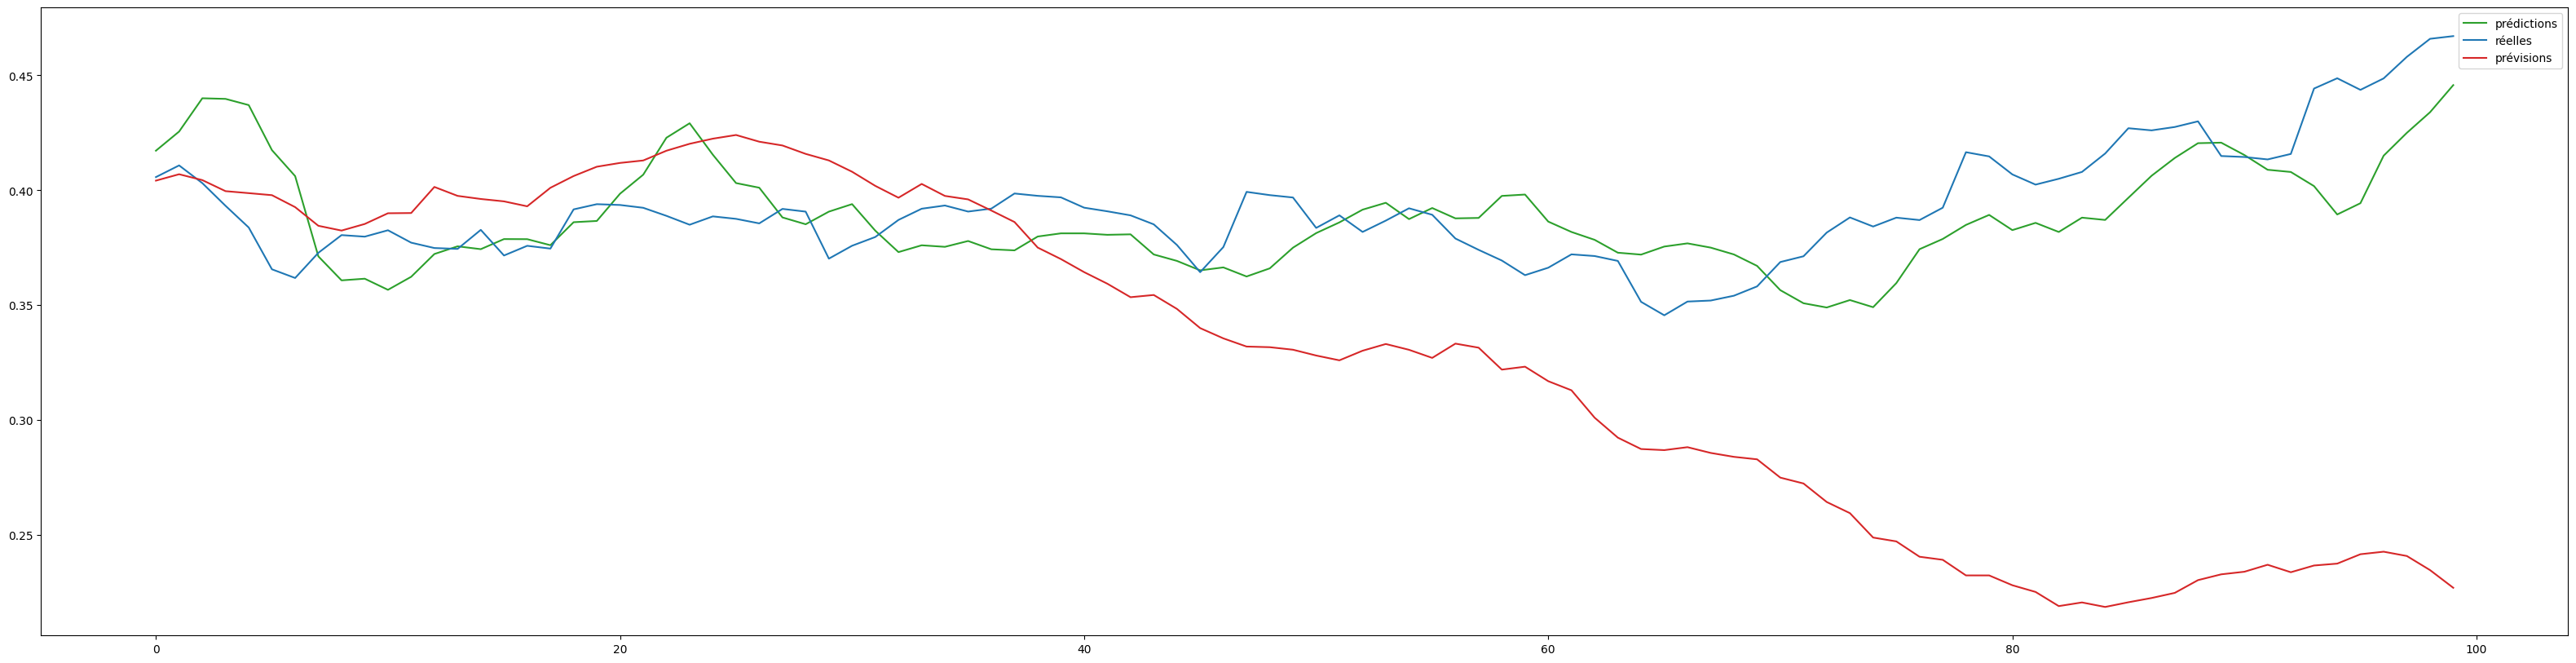

In [68]:
plt.figure(figsize=(40,10))
plt.plot(predictions[:len(prev)], color="C2")
plt.plot(l_ts[:len(prev)], color="C0")
plt.plot(prev, color="C3")
plt.legend(["prédictions","réelles","prévisions"])
plt.show()

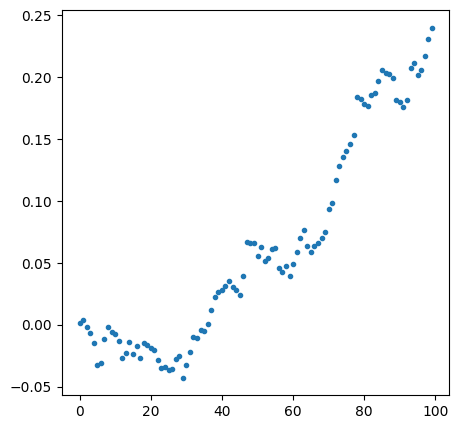

In [70]:
plt.figure(figsize=(5,5))
plt.plot(l_ts[:len(prev)]-prev,".", color="C0")
plt.show()

In [48]:
ncap=np.array(prev)
def plot_as_matrix(depart:int=0,taille:int=10):
    if depart+taille**2 <len(ncap):
        plt.figure(figsize=(5,5))
        vals=ncap[depart:depart+taille**2]
        vals=vals.reshape(taille,taille)
        plt.imshow(vals)
        plt.colorbar()
        plt.show()

ipywidgets.interact(plot_as_matrix, 
                    depart=(0,len(ncap)-1,1),
                    taille=(2,64,2)
                   )

interactive(children=(IntSlider(value=0, description='depart', max=714), IntSlider(value=10, description='tail…

<function __main__.plot_as_matrix(depart: int = 0, taille: int = 10)>

In [71]:
#qu'est ce qu'il a appris
y_p=model.predict(d_tr) 

94/94 [==============================] - 0s 1ms/step


In [75]:
y_p=y_p.reshape(len(y_p))
y_p

array([0.81768453, 0.8183025 , 0.8259126 , ..., 0.40452528, 0.4038896 ,
       0.41532952], dtype=float32)

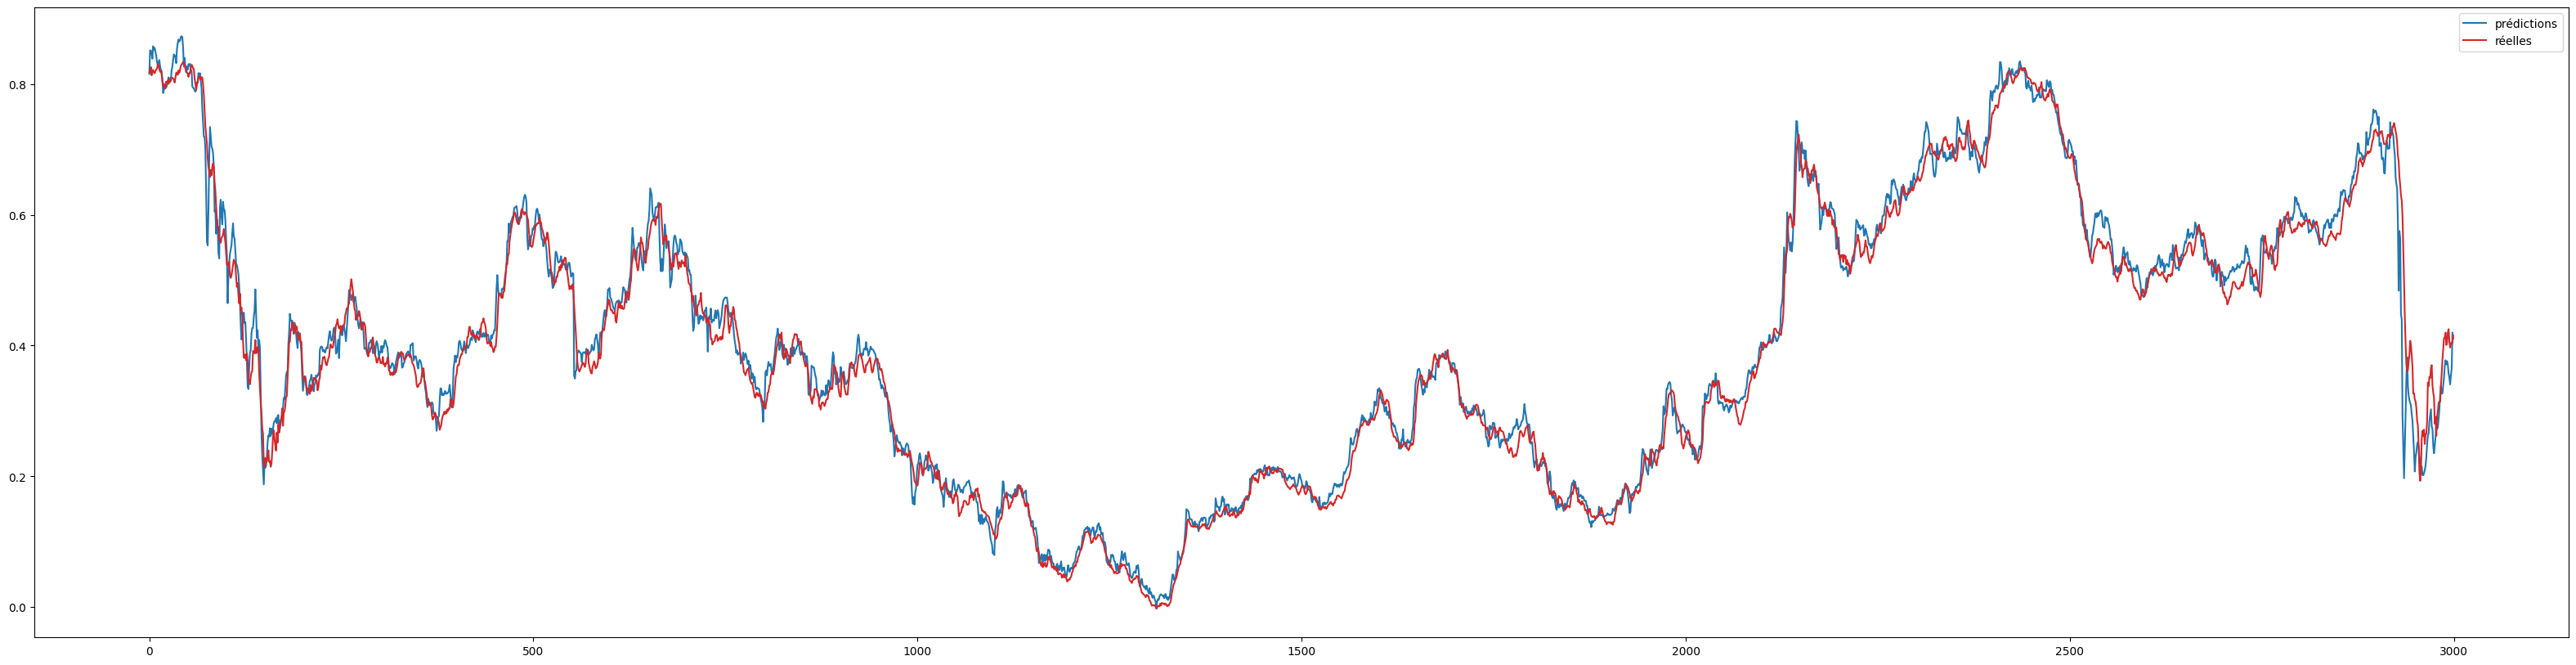

In [77]:
plt.figure(figsize=(40,10))
plt.plot(l_tr, color="C0")
plt.plot(y_p, color="C3")
plt.legend(["prédictions","réelles","prévisions"])
plt.show()